In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pubg-weapon-stats/pubg-weapon-stats.csv


In [2]:
df=pd.read_csv("/kaggle/input/pubg-weapon-stats/pubg-weapon-stats.csv")
df.head()

,Weapon Name,Weapon Type,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,Fire Mode,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3
0,Groza,Assault Rifle,7.62,49,30,400.0,715.0,0.080,4,2,612.0,"Single, Automatic, Burst",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
1,AKM,Assault Rifle,7.62,49,30,400.0,710.0,0.010,4,2,490.0,"Single, Automatic",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
2,M762,Assault Rifle,7.62,47,30,400.0,715.0,0.086,4,2,547.0,"Single, Automatic, Burst",46.0,32.9,28.2,21.1,110.4,77.3,66.2,49.7
3,MK47 Mutant,Assault Rifle,7.62,49,30,500.0,715.0,0.010,4,2,490.0,"Single, Burst",49.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
4,AUG A3,Assault Rifle,5.56,43,30,600.0,880.0,0.086,4,2,502.0,"Single, Automatic",41.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4


In [3]:
df.shape

(44, 20)

In [4]:
df.isnull().any()

Weapon Name              False
Weapon Type              False
Bullet Type               True
Damage                   False
Magazine Capacity        False
Range                     True
Bullet Speed              True
Rate of Fire             False
Shots to Kill (Chest)    False
Shots to Kill (Head)     False
Damage Per Second        False
Fire Mode                False
BDMG_0                    True
BDMG_1                    True
BDMG_2                    True
BDMG_3                    True
HDMG_0                    True
HDMG_1                    True
HDMG_2                    True
HDMG_3                    True
dtype: bool

In [5]:
df.dropna(axis=0,inplace=True)

In [6]:
df.shape

(35, 20)

# Basic EDA

**Distribution Of Bullet Types**

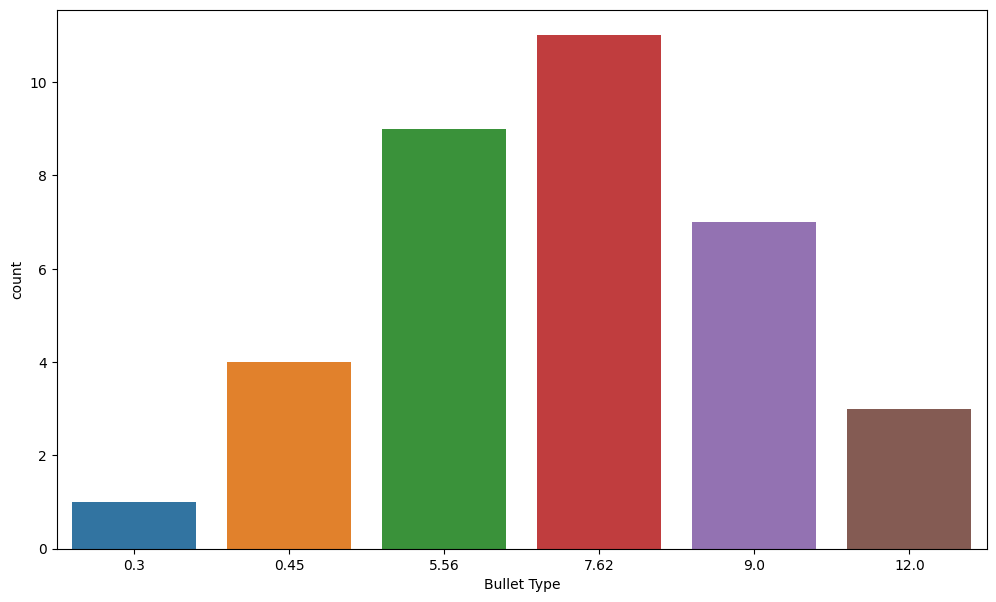

In [7]:
## bullet type
plt.figure(figsize=(12,7))
sns.countplot(data=df, x='Bullet Type')
plt.show()

**Distribution Of Weapon Types**

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Assault Rifle'),
  Text(1, 0, 'Light Machine Gun'),
  Text(2, 0, 'Submachine Gun'),
  Text(3, 0, 'Shotgun'),
  Text(4, 0, 'Designed Marksman Rifle'),
  Text(5, 0, 'Sniper Rifle'),
  Text(6, 0, 'Pistol')])

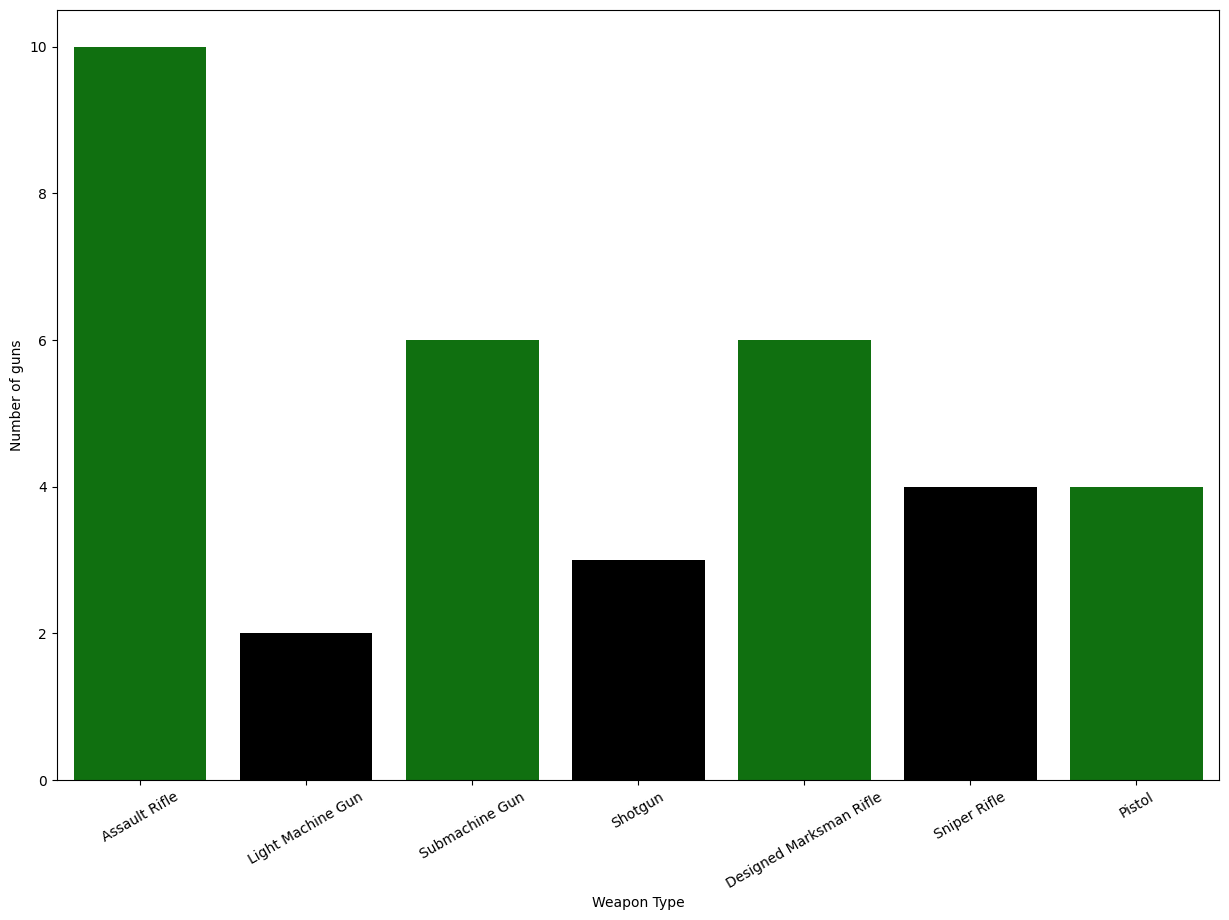

In [8]:
plt.figure(figsize=(15,10))
sns.countplot(x=df["Weapon Type"],palette=["green","black"],)
plt.ylabel("Number of guns")
plt.xticks(rotation=30)

# Lets Find Out Weapons By Their Types

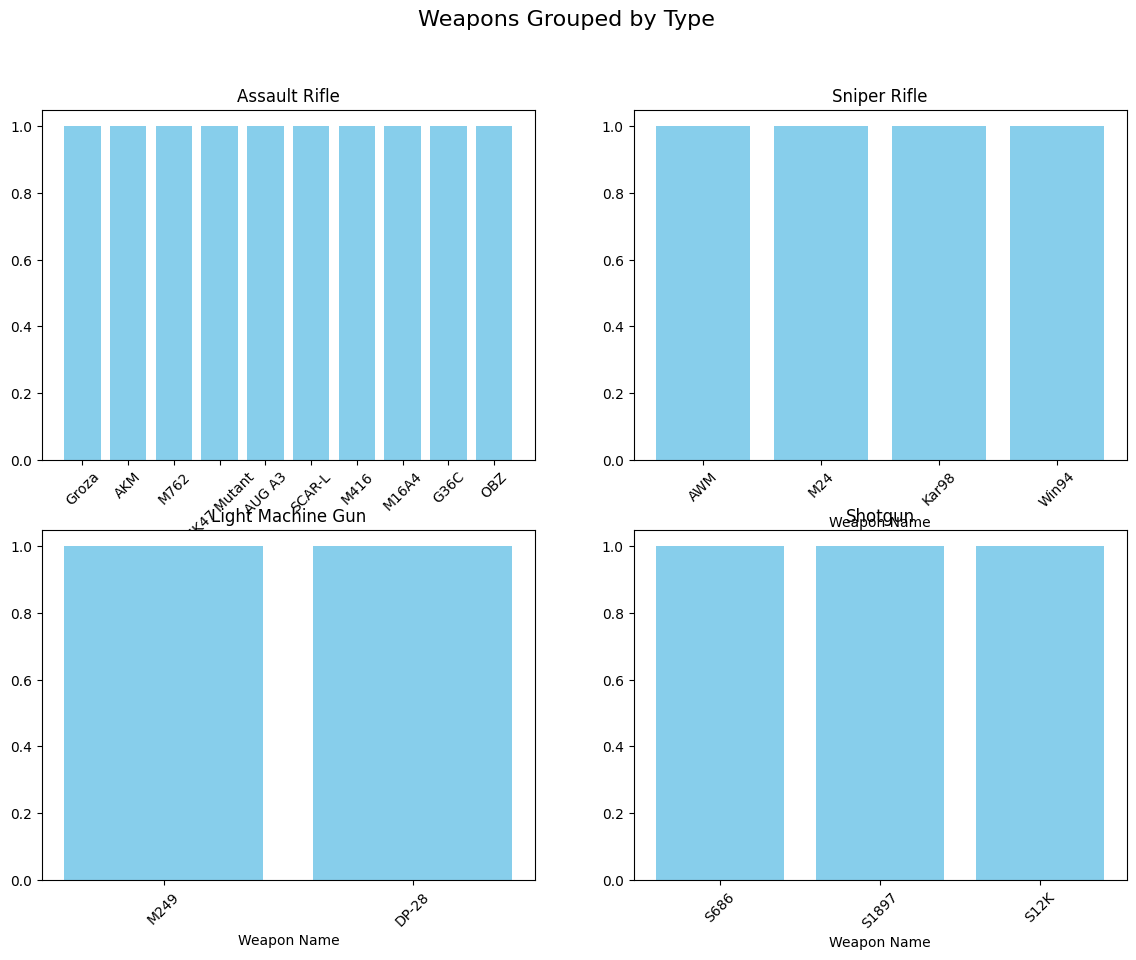

In [9]:
# Weapon types to group
weapon_types = ["Assault Rifle", "Sniper Rifle", "Light Machine Gun", "Shotgun"]

# Create subplots for all weapon types
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Weapons Grouped by Type", fontsize=16)
axes = axes.flatten()  # Make it easier to loop through axes

# Loop through weapon types and create a plot for each
for i, weapon_type in enumerate(weapon_types):
    # Filter weapons by type
    filtered_data = df.loc[df["Weapon Type"] == weapon_type, "Weapon Name"]
    weapon_counts = filtered_data.value_counts()  # Count each weapon
    
    # Plot weapon counts
    axes[i].bar(weapon_counts.index, weapon_counts.values, color="skyblue")
    axes[i].set_title(weapon_type)
    axes[i].tick_params(axis="x", rotation=45)
    axes[i].set_xlabel("Weapon Name")
   


# Lets Find Out Number Of Guns With Specific Ammo

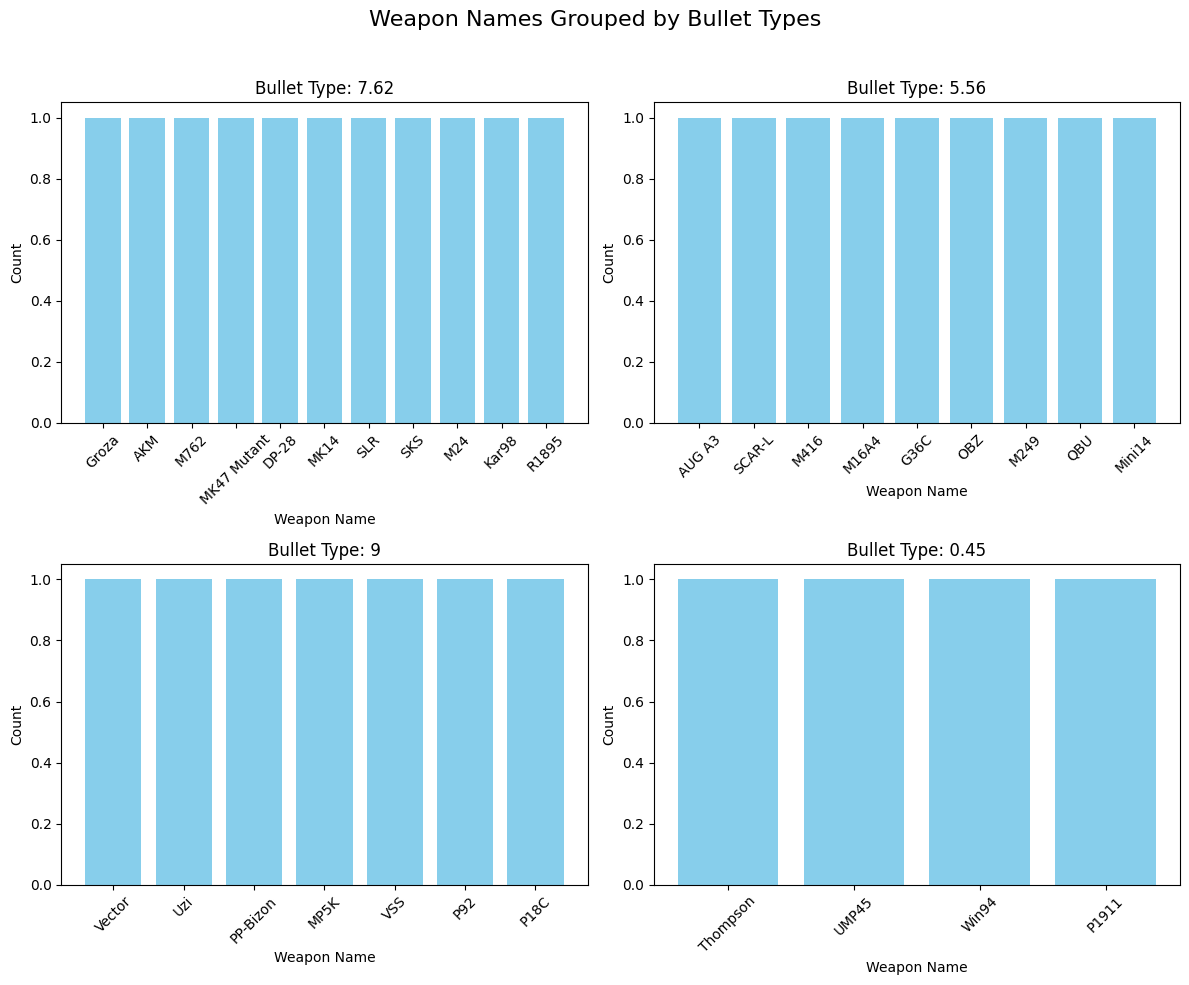

In [10]:
# Filter data for each bullet type
bullet_types = [7.62, 5.56, 9, 0.45]
filtered_dfs = {
    bullet: df.loc[df["Bullet Type"] == bullet, "Weapon Name"].reset_index()
    for bullet in bullet_types
}

# Plot the data
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Weapon Names Grouped by Bullet Types", fontsize=16)

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, (bullet, filtered_df) in enumerate(filtered_dfs.items()):
    weapon_names = filtered_df["Weapon Name"].value_counts()
    axes[i].bar(weapon_names.index, weapon_names.values, color="skyblue")
    axes[i].set_title(f"Bullet Type: {bullet}")
    axes[i].set_xlabel("Weapon Name")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis="x", rotation=45)

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# Lets Check Out Damage Under Each Weapon Type